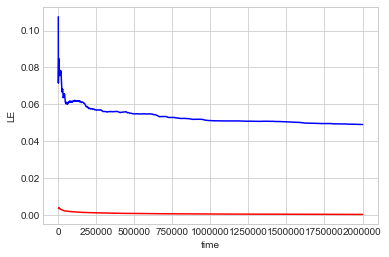

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize, special
from numpy import *
from pylab import *
import decimal
from numba import jit
plt.style.use("seaborn-whitegrid")

n=8000
h=200/n
m=10000

xo=np.zeros(n+1,dtype='float64')
yo=np.zeros(n+1,dtype='float64')
pxo=np.zeros(n+1,dtype='float64')
pyo=np.zeros(n+1,dtype='float64')

xl=np.zeros(n+1,dtype='float64')
yl=np.zeros(n+1,dtype='float64')
pxl=np.zeros(n+1,dtype='float64')
pyl=np.zeros(n+1,dtype='float64')


T=np.zeros(n+1,dtype='float64')
S=np.zeros(m+2,dtype='float64')
M=np.zeros(m+1,dtype='float64')
H=np.zeros(m+1,dtype='float64')
L=np.zeros(m+1,dtype='float64')

e=1/8

J=0

i=0
j=0
   
i=0
j=0  
X=0
Y=-0.15
PY=0.15
PX=(2*e-(PY**2)-(X**2)-(Y**2)-2*(X**2)*Y+(2*(Y**3)/3))**(1/2)
t=0

J=0


while j<=m:
    
    xo[i]=X
    yo[i]=Y
    pyo[i]=PY
    pxo[i]=PX

    xl[i]=xo[i]
    yl[i]=yo[i]+0.00000001
    pyl[i]=pyo[i]
    pxl[i]=np.sign(pxo[i])*(2*e-(pyl[i]**2)-(xl[i]**2)-(yl[i]**2)-2*(xl[i]**2)*yl[i]+(2*(yl[i]**3)/3))**(1/2)
    

    T[i]=t
    S[i]=math.sqrt((xo[i]-xl[i])**2+(yo[i]-yl[i])**2+(pxo[i]-pxl[i])**2+(pyo[i]-pyl[i])**2)
    i=i+1
    
    while i<=n:
        k11o=pxo[i-1]
        k12o=pyo[i-1]
        k13o=(-1)*xo[i-1]-2*xo[i-1]*yo[i-1]
        k14o=(-1)*yo[i-1]-(xo[i-1]**2)+(yo[i-1]**2)
        x1o=xo[i-1]+(h/2)*k11o
        y1o=yo[i-1]+(h/2)*k12o
        k21o=pxo[i-1]+(h/2)*k13o
        k22o=pyo[i-1]+(h/2)*k14o
        k23o=(-1)*x1o-2*(x1o)*(y1o)
        k24o=(-1)*y1o-((x1o)**2)+((y1o)**2)
        x2o=xo[i-1]+(h/2)*k21o
        y2o=yo[i-1]+(h/2)*k22o
        k31o=pxo[i-1]+(h/2)*k23o
        k32o=pyo[i-1]+(h/2)*k24o
        k33o=(-1)*x2o-2*(x2o)*(y2o)
        k34o=(-1)*y2o-((x2o)**2)+((y2o)**2)
        x3o=xo[i-1]+h*k31o
        y3o=yo[i-1]+h*k32o
        k41o=pxo[i-1]+h*k33o
        k42o=pyo[i-1]+h*k34o
        k43o=(-1)*x3o-2*(x3o)*(y3o)
        k44o=(-1)*y3o-((x3o)**2)+((y3o)**2)
        k1o=(1/6)*(k11o+2*k21o+2*k31o+k41o)
        k2o=(1/6)*(k12o+2*k22o+2*k32o+k42o)
        k3o=(1/6)*(k13o+2*k23o+2*k33o+k43o)
        k4o=(1/6)*(k14o+2*k24o+2*k34o+k44o)
        xo[i]=xo[i-1]+k1o*h
        yo[i]=yo[i-1]+k2o*h 
        pxo[i]=pxo[i-1]+k3o*h
        pyo[i]=pyo[i-1]+k4o*h
        
        k11l=pxl[i-1]
        k12l=pyl[i-1]
        k13l=(-1)*xl[i-1]-2*xl[i-1]*yl[i-1]
        k14l=(-1)*yl[i-1]-(xl[i-1]**2)+(yl[i-1]**2)
        x1l=xl[i-1]+(h/2)*k11l
        y1l=yl[i-1]+(h/2)*k12l

        k21l=pxl[i-1]+(h/2)*k13l
        k22l=pyl[i-1]+(h/2)*k14l
        k23l=(-1)*x1l-2*(x1l)*(y1l)
        k24l=(-1)*y1l-((x1l)**2)+((y1l)**2)
        x2l=xl[i-1]+(h/2)*k21l
        y2l=yl[i-1]+(h/2)*k22l

        k31l=pxl[i-1]+(h/2)*k23l
        k32l=pyl[i-1]+(h/2)*k24l
        k33l=(-1)*x2l-2*(x2l)*(y2l)
        k34l=(-1)*y2l-((x2l)**2)+((y2l)**2)
        x3l=xl[i-1]+h*k31l
        y3l=yl[i-1]+h*k32l
        k41l=pxl[i-1]+h*k33l
        k42l=pyl[i-1]+h*k34l
        k43l=(-1)*x3l-2*(x3l)*(y3l)
        k44l=(-1)*y3l-((x3l)**2)+((y3l)**2)
        k1l=(1/6)*(k11l+2*k21l+2*k31l+k41l)
        k2l=(1/6)*(k12l+2*k22l+2*k32l+k42l)
        k3l=(1/6)*(k13l+2*k23l+2*k33l+k43l)
        k4l=(1/6)*(k14l+2*k24l+2*k34l+k44l)
        xl[i]=xl[i-1]+k1l*h
        yl[i]=yl[i-1]+k2l*h 
        pxl[i]=pxl[i-1]+k3l*h
        pyl[i]=pyl[i-1]+k4l*h
        
        
        T[i]=T[i-1]+h
        i=i+1
    
    else:            
        S[j+1]=math.sqrt((xo[i-1]-xl[i-1])**2+(yo[i-1]-yl[i-1])**2+(pxo[i-1]-pxl[i-1])**2+(pyo[i-1]-pyl[i-1])**2)
        M[j]=math.log(S[j+1]/S[0])/200
        X=xo[i-1]
        Y=yo[i-1]
        PX=pxo[i-1]
        PY=pyo[i-1]
        t=T[i-1]
        J=J+M[j]
        L[j]=J/(j+1)
        H[j]=t
        j=j+1
        i=0
        
    

else:            
    plt.plot(H,L,c='b')
    j=j+1    

n=6000
h=1000/n
m=2000
xo=np.zeros(n+1,dtype='float64')
yo=np.zeros(n+1,dtype='float64')
pxo=np.zeros(n+1,dtype='float64')
pyo=np.zeros(n+1,dtype='float64')

xl=np.zeros(n+1,dtype='float64')
yl=np.zeros(n+1,dtype='float64')
pxl=np.zeros(n+1,dtype='float64')
pyl=np.zeros(n+1,dtype='float64')


T=np.zeros(n+1,dtype='float64')
S=np.zeros(m+2,dtype='float64')
M=np.zeros(m+1,dtype='float64')
H=np.zeros(m+1,dtype='float64')
L=np.zeros(m+1,dtype='float64')
i=0
j=0  
X=0
Y=0.24
PY=0
PX=(2*e-(PY**2)-(X**2)-(Y**2)-2*(X**2)*Y+(2*(Y**3)/3))**(1/2)
t=0

J=0


while j<=m:
    
    xo[i]=X
    yo[i]=Y
    pyo[i]=PY
    pxo[i]=PX

    xl[i]=xo[i]
    yl[i]=yo[i]+0.00000001
    pyl[i]=pyo[i]
    pxl[i]=np.sign(pxo[i])*(2*e-(pyl[i]**2)-(xl[i]**2)-(yl[i]**2)-2*(xl[i]**2)*yl[i]+(2*(yl[i]**3)/3))**(1/2)
    

    T[i]=t
    S[i]=math.sqrt((xo[i]-xl[i])**2+(yo[i]-yl[i])**2+(pxo[i]-pxl[i])**2+(pyo[i]-pyl[i])**2)
    i=i+1
    
    while i<=n:
        k11o=pxo[i-1]
        k12o=pyo[i-1]
        k13o=(-1)*xo[i-1]-2*xo[i-1]*yo[i-1]
        k14o=(-1)*yo[i-1]-(xo[i-1]**2)+(yo[i-1]**2)
        x1o=xo[i-1]+(h/2)*k11o
        y1o=yo[i-1]+(h/2)*k12o
        k21o=pxo[i-1]+(h/2)*k13o
        k22o=pyo[i-1]+(h/2)*k14o
        k23o=(-1)*x1o-2*(x1o)*(y1o)
        k24o=(-1)*y1o-((x1o)**2)+((y1o)**2)
        x2o=xo[i-1]+(h/2)*k21o
        y2o=yo[i-1]+(h/2)*k22o
        k31o=pxo[i-1]+(h/2)*k23o
        k32o=pyo[i-1]+(h/2)*k24o
        k33o=(-1)*x2o-2*(x2o)*(y2o)
        k34o=(-1)*y2o-((x2o)**2)+((y2o)**2)
        x3o=xo[i-1]+h*k31o
        y3o=yo[i-1]+h*k32o
        k41o=pxo[i-1]+h*k33o
        k42o=pyo[i-1]+h*k34o
        k43o=(-1)*x3o-2*(x3o)*(y3o)
        k44o=(-1)*y3o-((x3o)**2)+((y3o)**2)
        k1o=(1/6)*(k11o+2*k21o+2*k31o+k41o)
        k2o=(1/6)*(k12o+2*k22o+2*k32o+k42o)
        k3o=(1/6)*(k13o+2*k23o+2*k33o+k43o)
        k4o=(1/6)*(k14o+2*k24o+2*k34o+k44o)
        xo[i]=xo[i-1]+k1o*h
        yo[i]=yo[i-1]+k2o*h 
        pxo[i]=pxo[i-1]+k3o*h
        pyo[i]=pyo[i-1]+k4o*h
        
        k11l=pxl[i-1]
        k12l=pyl[i-1]
        k13l=(-1)*xl[i-1]-2*xl[i-1]*yl[i-1]
        k14l=(-1)*yl[i-1]-(xl[i-1]**2)+(yl[i-1]**2)
        x1l=xl[i-1]+(h/2)*k11l
        y1l=yl[i-1]+(h/2)*k12l

        k21l=pxl[i-1]+(h/2)*k13l
        k22l=pyl[i-1]+(h/2)*k14l
        k23l=(-1)*x1l-2*(x1l)*(y1l)
        k24l=(-1)*y1l-((x1l)**2)+((y1l)**2)
        x2l=xl[i-1]+(h/2)*k21l
        y2l=yl[i-1]+(h/2)*k22l

        k31l=pxl[i-1]+(h/2)*k23l
        k32l=pyl[i-1]+(h/2)*k24l
        k33l=(-1)*x2l-2*(x2l)*(y2l)
        k34l=(-1)*y2l-((x2l)**2)+((y2l)**2)
        x3l=xl[i-1]+h*k31l
        y3l=yl[i-1]+h*k32l
        k41l=pxl[i-1]+h*k33l
        k42l=pyl[i-1]+h*k34l
        k43l=(-1)*x3l-2*(x3l)*(y3l)
        k44l=(-1)*y3l-((x3l)**2)+((y3l)**2)
        k1l=(1/6)*(k11l+2*k21l+2*k31l+k41l)
        k2l=(1/6)*(k12l+2*k22l+2*k32l+k42l)
        k3l=(1/6)*(k13l+2*k23l+2*k33l+k43l)
        k4l=(1/6)*(k14l+2*k24l+2*k34l+k44l)
        xl[i]=xl[i-1]+k1l*h
        yl[i]=yl[i-1]+k2l*h 
        pxl[i]=pxl[i-1]+k3l*h
        pyl[i]=pyl[i-1]+k4l*h
        
        
        T[i]=T[i-1]+h
        i=i+1
    
    else:            
        S[j+1]=math.sqrt((xo[i-1]-xl[i-1])**2+(yo[i-1]-yl[i-1])**2+(pxo[i-1]-pxl[i-1])**2+(pyo[i-1]-pyl[i-1])**2)
        M[j]=math.log(S[j+1]/S[0])/1000
        X=xo[i-1]
        Y=yo[i-1]
        PX=pxo[i-1]
        PY=pyo[i-1]
        t=T[i-1]
        J=J+M[j]
        L[j]=J/(j+1)
        H[j]=t
        j=j+1
        i=0
        
    

else:            
    plt.plot(H,L,c='r')
    j=j+1   

plt.xlabel('time')
plt.ylabel('LE') 
plt.savefig("D:/temp9.png")
plt.show()